<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-ML/blob/main/ONE_IA_Atrasos_Voos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explorando os dados

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
url = 'https://raw.githubusercontent.com/mauricioaalmeida/ONE-ML/refs/heads/main/data/flights.csv'
dados = pd.read_csv(url)
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [6]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [7]:
dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


Os dados estão aparentemente limpos, sem valores nulos e com tipos coerentes, os valores parecem condizentes, a principio sem Outliers consideráveis

## Visualizações Gráficas dos dados

In [18]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
average_delay

,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


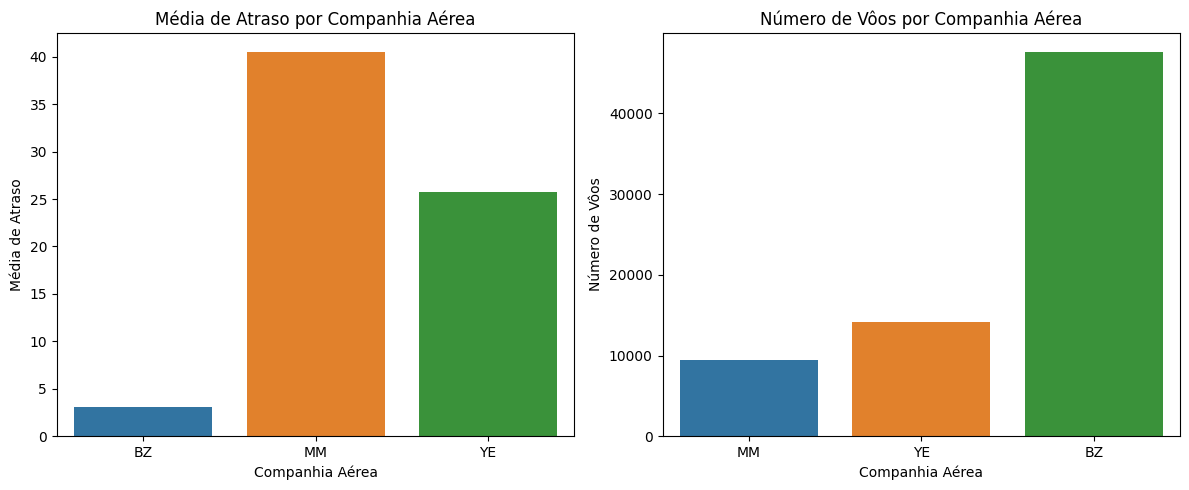

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x='airline', y='delay', data=average_delay, hue='airline', ax=axs[0])
axs[0].set_title('Média de Atraso por Companhia Aérea')
axs[0].set_xlabel('Companhia Aérea')
axs[0].set_ylabel('Média de Atraso')

sns.countplot(x='airline', data=dados, hue='airline', ax=axs[1])
axs[1].set_title('Número de Vôos por Companhia Aérea')
axs[1].set_xlabel('Companhia Aérea')
axs[1].set_ylabel('Número de Vôos')

plt.tight_layout()
plt.show()

In [29]:
def voos_atrasos(dados, col_filtro, col_obj):
  average_delay = dados.groupby(col_filtro)[col_obj].mean().reset_index()
  average_delay
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  sns.barplot(x=col_filtro, y=col_obj, data=average_delay, hue=col_filtro, ax=axs[0])
  axs[0].set_title(f'Média de Atraso por {col_filtro}')
  axs[0].set_xlabel(col_filtro)
  axs[0].set_ylabel('Média de Atraso')

  sns.countplot(x=col_filtro, data=dados, hue='airline', ax=axs[1])
  axs[1].set_title(f'Número de Vôos por {col_filtro}')
  axs[1].set_xlabel(col_filtro)
  axs[1].set_ylabel('Número de Vôos')

  plt.tight_layout()
  return plt

AttributeError: 'Axes' object has no attribute 'xticks'

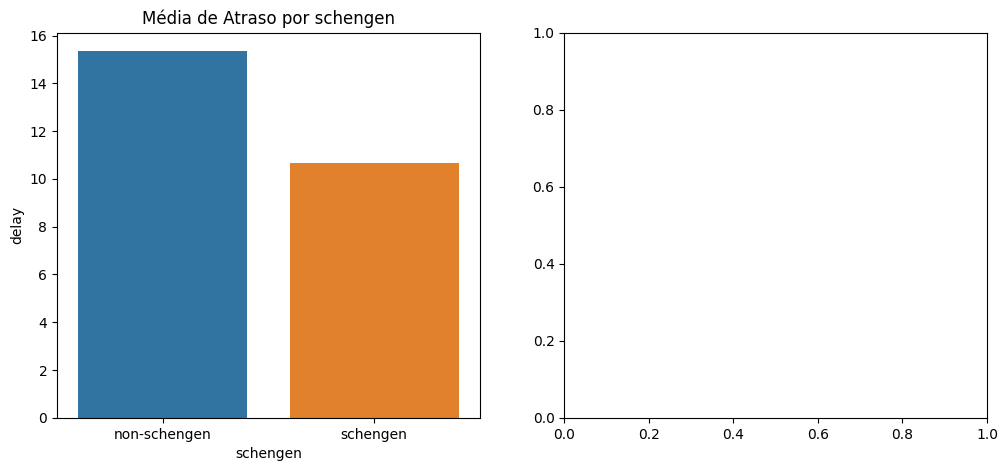

In [28]:
voos_atrasos(dados, 'schengen', 'delay').show()

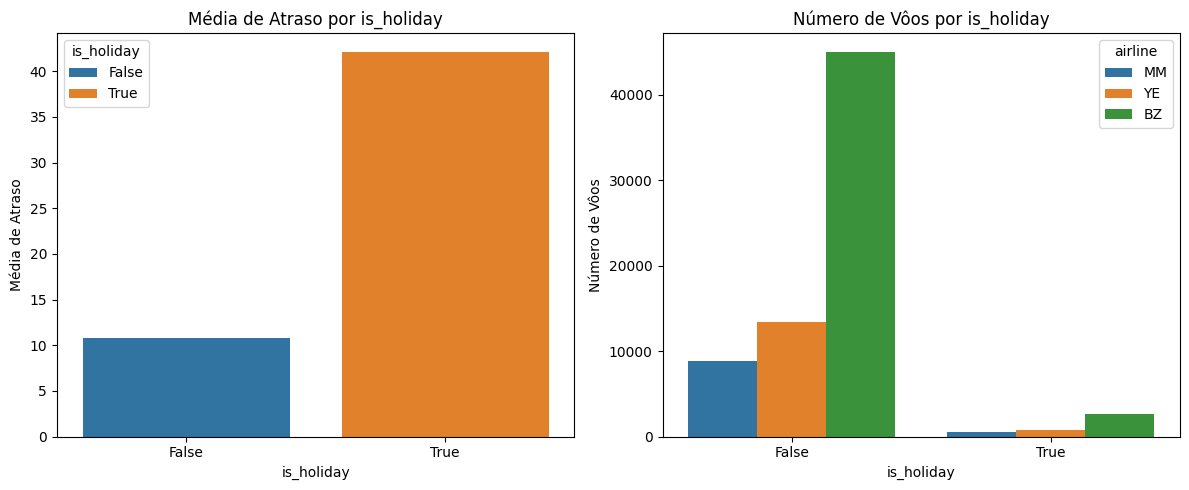

In [25]:
voos_atrasos(dados, 'is_holiday', 'delay').show()

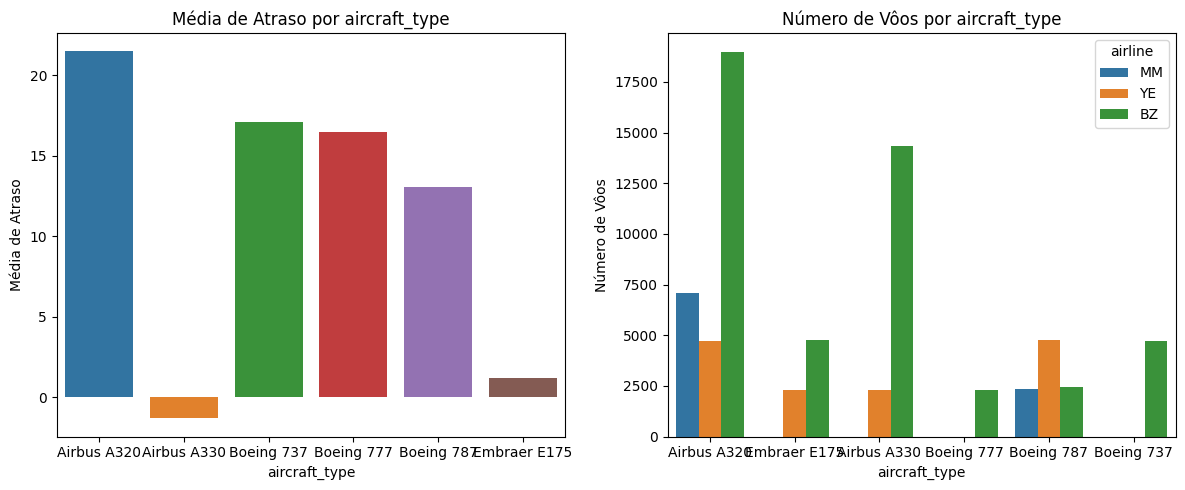

In [30]:
voos_atrasos(dados, 'aircraft_type', 'delay').show()

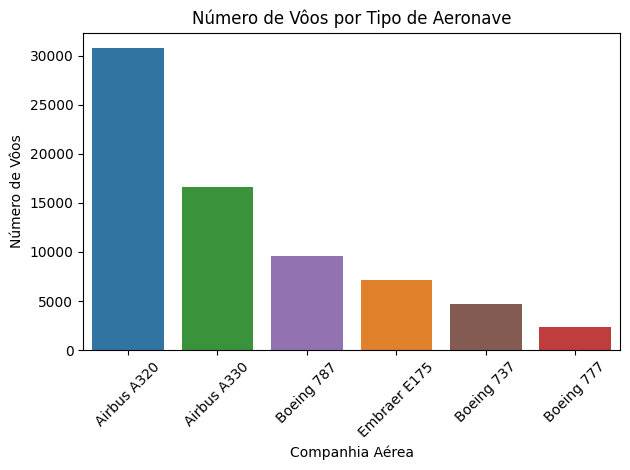

In [38]:
order = dados['aircraft_type'].value_counts().index

sns.countplot(x='aircraft_type', data=dados, hue='aircraft_type', order=order)
plt.title('Número de Vôos por Tipo de Aeronave')
plt.xlabel('Companhia Aérea')
plt.xticks(rotation=45)
plt.ylabel('Número de Vôos')

plt.tight_layout()
plt.show()

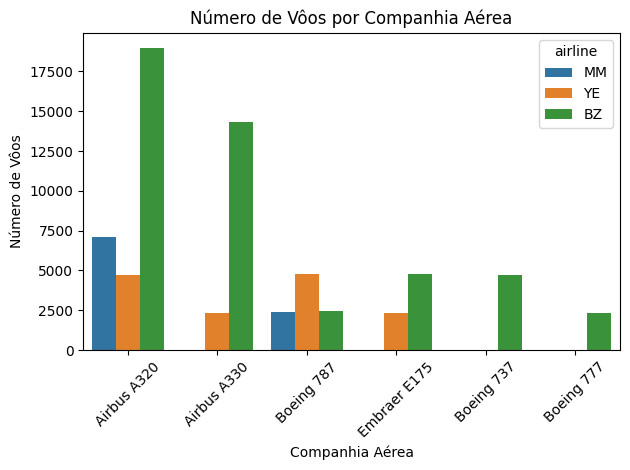

In [34]:
order = dados['aircraft_type'].value_counts().index

sns.countplot(x='aircraft_type', data=dados, hue='airline', order=order)
plt.title('Número de Vôos por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.xticks(rotation=45)
plt.ylabel('Número de Vôos')

plt.tight_layout()
plt.show()